# PROJECT-12

# CREDIT CARD FRAUD DETECTION

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
import sklearn
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
import warnings
warnings.filterwarnings ("ignore")

In [11]:
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report)

In [14]:
data=pd.read_csv("credit.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
data.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [16]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,...,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000
mean,240.723982,-0.173477,0.202923,0.868027,0.313785,0.004962,0.191067,0.120179,-0.057877,-0.021444,...,0.011559,-0.101324,-0.039138,-0.001128,0.118359,0.023800,0.026277,-0.015521,70.339698,0.039216
std,147.066052,1.318746,1.195083,1.017452,1.268028,1.131101,1.248768,0.860575,0.828433,0.897497,...,0.611034,0.609244,0.369201,0.628296,0.426569,0.468524,0.308202,0.291046,206.447777,0.194254
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.770089,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.735623,0.000000,0.000000
25%,105.000000,-0.901810,-0.174201,0.312139,-0.436332,-0.552683,-0.613937,-0.324460,-0.157950,-0.517152,...,-0.219877,-0.528465,-0.172574,-0.384946,-0.160158,-0.313228,-0.045075,-0.015932,5.980000,0.000000
50%,241.000000,-0.376162,0.277666,0.897601,0.448154,-0.107492,-0.068701,0.117003,0.044961,-0.074016,...,-0.070069,-0.069830,-0.045366,0.091900,0.145526,-0.015710,0.023011,0.022966,17.240000,0.000000
75%,366.000000,1.108861,0.877669,1.509547,1.140908,0.466815,0.490715,0.567376,0.262158,0.415102,...,0.102520,0.311334,0.073547,0.429625,0.439774,0.263885,0.115571,0.087914,57.750000,0.000000
max,499.000000,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,1.726413,5.459274,...,5.273420,1.461535,3.150413,1.215279,1.136720,3.065576,2.490503,1.575380,3828.040000,1.000000


In [17]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

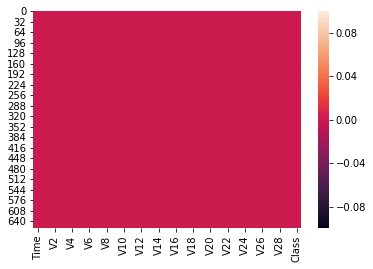

In [18]:
sns.heatmap(data.isnull())

In [20]:
x=data.drop("Class",axis=1)
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [21]:
y=data["Class"]
y

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
633    0
634    0
635    0
636    0
637    0
638    0
639    0
640    0
641    0
642    0
643    0
644    0
645    0
646    0
647    0
648    0
649    0
650    0
651    0
652    0
653    0
654    0
655    0
656    0
657    0
658    0
659    0
660    0
661    0
662    0
Name: Class, Length: 663, dtype: int64

In [26]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [27]:
print(x.shape)
print(y.shape)

(663, 30)
(663,)


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=71)

In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(517, 30)
(146, 30)
(517,)
(146,)


In [33]:
lg=LogisticRegression()

In [34]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
pred=lg.predict(x_test)
print(accuracy_score(y_test,pred))

0.9452054794520548


In [36]:
print(confusion_matrix(y_test,pred))

[[138   2]
 [  6   0]]


In [37]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       140
           1       0.00      0.00      0.00         6

    accuracy                           0.95       146
   macro avg       0.48      0.49      0.49       146
weighted avg       0.92      0.95      0.93       146



In [38]:
from sklearn.metrics import roc_curve

In [39]:
y_pred_prob=lg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.03126741, 0.01656621, 0.00469741, 0.00392637, 0.03006174,
       0.06273251, 0.01949234, 0.00507808, 0.09053548, 0.01383813,
       0.0191036 , 0.09855166, 0.04213361, 0.02005124, 0.05067938,
       0.01015016, 0.06484743, 0.02170709, 0.02018524, 0.01332864,
       0.00593077, 0.07873099, 0.00233633, 0.06097553, 0.01109762,
       0.0054292 , 0.04412867, 0.05246851, 0.00774703, 0.11615032,
       0.04701196, 0.03813182, 0.03932749, 0.02610493, 0.01859532,
       0.0276901 , 0.0186147 , 0.11659583, 0.0964052 , 0.00156628,
       0.05140593, 0.01255857, 0.01033287, 0.00589195, 0.02347934,
       0.01287129, 0.00598751, 0.02204727, 0.03259436, 0.01445955,
       0.02971101, 0.00252797, 0.04430668, 0.10656252, 0.02482725,
       0.01654238, 0.00078356, 0.07150471, 0.01702294, 0.1808141 ,
       0.6875934 , 0.00285031, 0.04096237, 0.05932911, 0.01479224,
       0.0554533 , 0.0312175 , 0.13253577, 0.02051471, 0.05294853,
       0.01683635, 0.06443424, 0.01939358, 0.00525951, 0.01512

In [40]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [41]:
print(fpr)
print(tpr)
print(thresholds)

[0.         0.00714286 0.07857143 0.07857143 0.27142857 0.27142857
 0.35714286 0.35714286 0.52142857 0.52142857 0.64285714 0.64285714
 0.85714286 0.85714286 1.        ]
[0.         0.         0.         0.16666667 0.16666667 0.33333333
 0.33333333 0.5        0.5        0.66666667 0.66666667 0.83333333
 0.83333333 1.         1.        ]
[1.68759340e+00 6.87593396e-01 1.14841129e-01 1.06562521e-01
 4.79731647e-02 4.70119557e-02 3.82943758e-02 3.81318226e-02
 2.29880879e-02 2.20472686e-02 1.75255763e-02 1.70229352e-02
 7.79893954e-03 7.74703302e-03 7.83558157e-04]


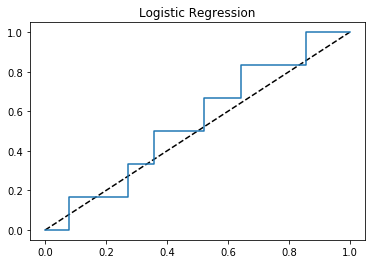

In [42]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="LogisticRegression")
plt.title("Logistic Regression")
plt.show()

In [44]:
from sklearn.metrics import roc_auc_score

In [46]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))
print(auc_score)

0.4928571428571429


In [49]:
#Applying Bagging Methods
from sklearn.ensemble import RandomForestClassifier

In [50]:
rfc=RandomForestClassifier(n_estimators=300,random_state=42)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)

1.0

In [51]:
#Apllying Boosting method
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)

1.0

In [58]:
print(accuracy_score(y_test,pred))
print(auc_score)
print(rfc.score(x_train,y_train))
print(gbc.score(x_train,y_train))

0.9452054794520548
0.4928571428571429
1.0
1.0


In [61]:
from sklearn.externals import joblib
joblib.dump(rfc,"credit_card_fraud")
rfc_from_joblib=joblib.load("credit_card_fraud")
rfc_from_joblib.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)